In [55]:
import pandas as pd
import seaborn as sns
import scipy.stats as st

## Assignment 13

In [56]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [57]:
def create_contingency_table(dataset, column1, column2):
    return dataset.groupby([column1, column2]).size().unstack(column1, fill_value=0)

### Species vs sex

In [58]:
penguinsContingencyTable = create_contingency_table(penguins, 'species','sex')
penguinsContingencyTable

species,Adelie,Chinstrap,Gentoo
sex,,,
Female,73,34,58
Male,73,34,61


In de correlatie tabel is te zien dat alle waardes ongeveer gelijk zijn. Hieruit kan er een conclusie getrokken worden dat er geen verband is tussen het geslacht van de pengiun en zijn/haar soort.

<AxesSubplot:xlabel='sex'>

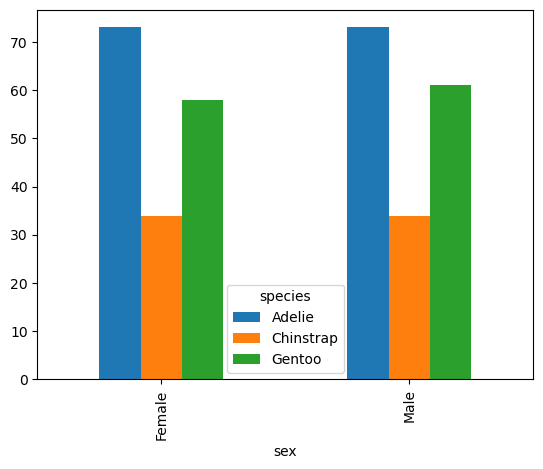

In [59]:
penguinsContingencyTable.plot(kind='bar')

In [60]:
from scipy.stats import chi2_contingency
def check_cat_vs_cat_correlation(dataset, column1, column2):
    contingency_table = create_contingency_table(dataset, column1, column2)
    chi2 = chi2_contingency(contingency_table)    
    p_value = chi2[1]
    odds_of_correlation = 1 - p_value
    print(f"The odds of a correlation between {column1} and {column2} is {odds_of_correlation * 100}% (Based on a p value of {p_value}).")
    print("This percentage needs to be at least 95% for a significant correlation.")

In [61]:
check_cat_vs_cat_correlation(penguins, 'species','sex')

The odds of a correlation between species and sex is 2.4010631023415385% (Based on a p value of 0.9759893689765846).
This percentage needs to be at least 95% for a significant correlation.


Uit bovenstaande grafiek is te halen dat er elke soort ongeveer evenveel mannen als vrouwen bevat. Dit betekent dat er geen verband is tussen de soort en het geslacht omdat er geen soort is die een groot verschil heeft tussen aantal mannetjes en vrouwtjes. Dit is ook te halen uit het correlatie percentage, dit is enorm laag wat aangeeft dat er geen verband is tussen de twee categorische waarden.

### Island vs sex

In [62]:
penguinsContingencyTable = create_contingency_table(penguins, 'island','sex')
penguinsContingencyTable

island,Biscoe,Dream,Torgersen
sex,,,
Female,80,61,24
Male,83,62,23


In de correlatie tabel is te zien dat alle waardes ongeveer gelijk zijn. Hieruit kan er een conclusie getrokken worden dat er geen verband is tussen het geslacht van de pengiun en zijn/haar eiland.

<AxesSubplot:xlabel='sex'>

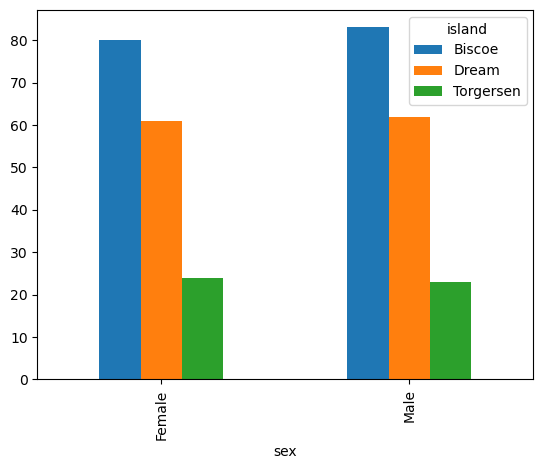

In [63]:
penguinsContingencyTable.plot(kind='bar')

In [64]:
from scipy.stats import chi2_contingency
def check_cat_vs_cat_correlation(dataset, column1, column2):
    contingency_table = create_contingency_table(dataset, column1, column2)
    chi2 = chi2_contingency(contingency_table)    
    p_value = chi2[1]
    odds_of_correlation = 1 - p_value
    print(f"The odds of a correlation between {column1} and {column2} is {odds_of_correlation * 100}% (Based on a p value of {p_value}).")
    print("This percentage needs to be at least 95% for a significant correlation.")

In [65]:
check_cat_vs_cat_correlation(penguins, 'island','sex')

The odds of a correlation between island and sex is 2.8388770718934975% (Based on a p value of 0.971611229281065).
This percentage needs to be at least 95% for a significant correlation.


Uit bovenstaande grafiek is te halen dat er elk eiland ongeveer evenveel mannen als vrouwen bevat. Dit betekent dat er geen verband is tussen de leefomgeving (het eiland) en het geslacht omdat er geen eiland is die een groot verschil heeft tussen aantal mannetjes en vrouwtjes. Dit is ook te halen uit het correlatie percentage, dit is enorm laag wat aangeeft dat er geen verband is tussen de twee categorische waarden.

## Assignment 14

In [66]:
songs = pd.read_csv('songs.csv', index_col='Unnamed: 0', quotechar="`") 
songs

,Title,Artist,Genre,Year,BPM,Energy,Danceability,dB,Live,Valence,Duration,Acousticness,Speechiness,Popularity
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


#### Genre vs Year

In [67]:
songs.Genre.value_counts(dropna=False).head(10)

dance pop                    327
pop                           60
canadian pop                  34
barbadian pop                 15
boy band                      15
electropop                    13
british soul                  11
big room                      10
canadian contemporary r&b      9
neo mellow                     9
Name: Genre, dtype: int64

In [68]:
top10Genres = songs[(songs.Genre == 'dance pop') | (songs.Genre == 'pop') | (songs.Genre == 'canadian pop') | (songs.Genre == 'barbadian pop') | (songs.Genre == 'boy band')]
# | (songs.Genre == 'electropop') | (songs.Genre == 'british soul') | (songs.Genre == 'big room') | (songs.Genre == 'candadian contemporary r&b') | (songs.Genre == 'neo mellow')]
top10Genres

,Title,Artist,Genre,Year,BPM,Energy,Danceability,dB,Live,Valence,Duration,Acousticness,Speechiness,Popularity
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
6,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77
7,Dynamite,Taio Cruz,dance pop,2010,120,78,75,-4,4,82,203,0,9,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,Antisocial (with Travis Scott),Ed Sheeran,pop,2019,152,82,72,-5,36,91,162,13,5,78
599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70


In [69]:
genreContingencyTable = create_contingency_table(top10Genres, 'Genre','Year')
genreContingencyTable

Genre,barbadian pop,boy band,canadian pop,dance pop,pop
Year,,,,,
2010,2,0,1,31,3
2011,4,0,1,38,4
2012,3,2,3,15,7
2013,1,6,2,42,5
2014,0,1,0,27,9
2015,2,3,11,52,8
2016,2,0,7,46,1
2017,0,1,3,31,5
2018,1,0,5,38,9


<AxesSubplot:xlabel='Year'>

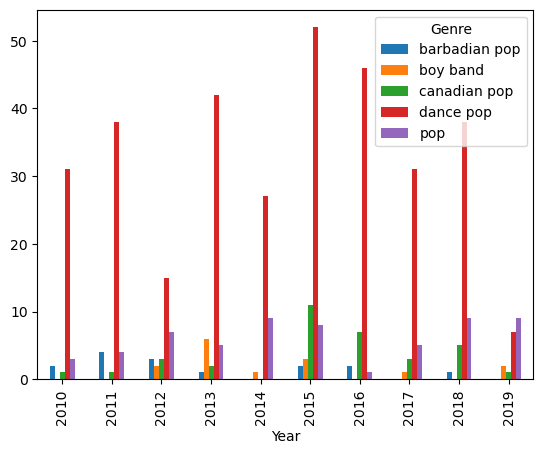

In [70]:
genreContingencyTable.plot(kind='bar')

In de grafiek is te zien dat er veel verschil is tussen de verschillende jaren. Er zijn een aantal genres die in bepaalde jaren niet voorkomen, en in de andere jaren juist wel weer. In 2014 is namelijk te zien dat de enige genres die toen populair waren boy band, dance pop en pop zijn. De andere genres komen niet voor in dit jaar. Dit betekent dat er een verband is tussen bepaalde genres en het jaar. Niet alle genres zijn afhankelijk van het jaartal, dance pop bijvoorbeeld. Al is er een groot verschil te zien in het aantal nummers per jaar met dit genre, komt het elk jaar wel het meeste voor. 

In [71]:
check_cat_vs_cat_correlation(top10Genres, 'Genre','Year')

The odds of a correlation between Genre and Year is 99.99926529409969% (Based on a p value of 7.347059003050109e-06).
This percentage needs to be at least 95% for a significant correlation.


#### Artist vs Genre

In [72]:
top5Artists = songs[(songs.Artist == 'Katy Perry') | (songs.Artist == 'Justin Bieber') | (songs['Artist'] == 'Rihanna') | (songs['Artist'] == 'Maroon 5') | (songs['Artist'] == 'Lady Gaga') | 
(songs.Artist == 'Bruno Mars') | (songs.Artist == 'Shawn Mendes') | (songs['Artist'] == 'Pitbull') | (songs['Artist'] == 'Ed Sheeran') | (songs['Artist'] == 'The Chainsmokers') ]
top5Artists

,Title,Artist,Genre,Year,BPM,Energy,Danceability,dB,Live,Valence,Duration,Acousticness,Speechiness,Popularity
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
6,Baby,Justin Bieber,canadian pop,2010,65,86,73,-5,11,54,214,4,14,77
10,Only Girl (In The World),Rihanna,barbadian pop,2010,126,72,79,-4,7,61,235,13,4,73
12,Marry You,Bruno Mars,pop,2010,145,83,62,-5,10,48,230,33,4,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,Girls Like You (feat. Cardi B),Maroon 5,pop,2019,125,54,85,-7,13,45,236,57,5,81
594,Call You Mine,The Chainsmokers,electropop,2019,104,70,59,-6,34,52,218,20,3,81
596,Antisocial (with Travis Scott),Ed Sheeran,pop,2019,152,82,72,-5,36,91,162,13,5,78
600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75


In [73]:
artistContingencyTable = create_contingency_table(top5Artists, 'Artist','Genre')
artistContingencyTable

Artist,Bruno Mars,Ed Sheeran,Justin Bieber,Katy Perry,Lady Gaga,Maroon 5,Pitbull,Rihanna,Shawn Mendes,The Chainsmokers
Genre,,,,,,,,,,
barbadian pop,0,0,0,0,0,0,0,15,0,0
canadian pop,0,0,16,0,0,0,0,0,11,0
dance pop,0,0,0,17,14,0,11,0,0,0
electropop,0,0,0,0,0,0,0,0,0,11
pop,13,11,0,0,0,15,0,0,0,0


In [74]:
songs.Artist.value_counts(dropna=False).head(10)

Katy Perry          17
Justin Bieber       16
Rihanna             15
Maroon 5            15
Lady Gaga           14
Bruno Mars          13
Shawn Mendes        11
Pitbull             11
Ed Sheeran          11
The Chainsmokers    11
Name: Artist, dtype: int64

In [75]:
artistContingencyTable = create_contingency_table(top5Artists, 'Artist','Genre')
artistContingencyTable

Artist,Bruno Mars,Ed Sheeran,Justin Bieber,Katy Perry,Lady Gaga,Maroon 5,Pitbull,Rihanna,Shawn Mendes,The Chainsmokers
Genre,,,,,,,,,,
barbadian pop,0,0,0,0,0,0,0,15,0,0
canadian pop,0,0,16,0,0,0,0,0,11,0
dance pop,0,0,0,17,14,0,11,0,0,0
electropop,0,0,0,0,0,0,0,0,0,11
pop,13,11,0,0,0,15,0,0,0,0


<AxesSubplot:xlabel='Genre'>

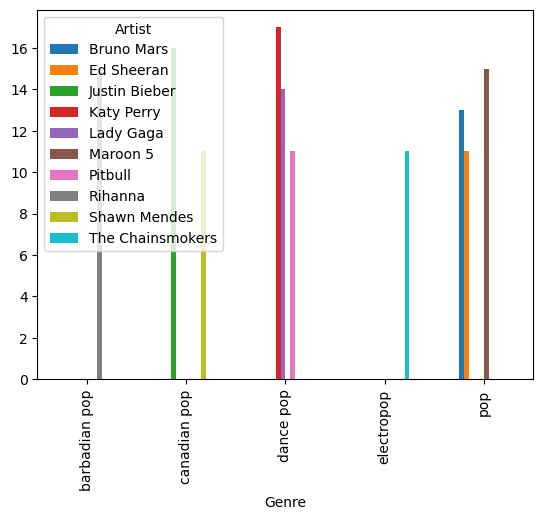

In [76]:
artistContingencyTable.plot(kind='bar')

Deze grafiek geeft duidelijk aan dat een artiest niet afwijkt van een genre. Er is geen enkele artiest die in meerdere genres voorkomt. Dit geeft aan dat er een heel sterk verband is tussen de artiest en het genre van het nummer. 

In [77]:
check_cat_vs_cat_correlation(top5Artists, 'Artist','Genre')

The odds of a correlation between Artist and Genre is 100.0% (Based on a p value of 2.315510297008894e-90).
This percentage needs to be at least 95% for a significant correlation.


#### Artist vs Year

In [78]:
artistYearContingencyTable = create_contingency_table(top5Artists, 'Year','Artist')
artistYearContingencyTable

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Artist,,,,,,,,,,
Bruno Mars,2,3,2,0,3,0,0,2,1,0
Ed Sheeran,0,0,0,0,0,4,0,1,1,5
Justin Bieber,1,0,2,1,0,9,2,0,1,0
Katy Perry,2,3,3,1,3,1,1,3,0,0
Lady Gaga,3,5,0,1,1,0,2,1,1,0
Maroon 5,1,1,2,2,1,3,0,1,2,2
Pitbull,0,1,2,2,1,3,0,2,0,0
Rihanna,2,4,3,1,0,2,2,0,1,0
Shawn Mendes,0,0,0,0,0,1,3,2,4,1


<AxesSubplot:xlabel='Artist'>

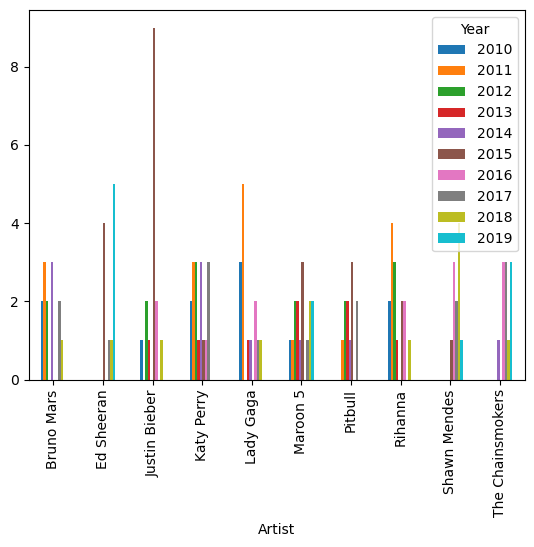

In [79]:
artistYearContingencyTable.plot(kind='bar')

Op het eerste gezicht lijkt het alsof er geen verband zit tussen de artiest en het jaar. Echter als je goed gaat kijken vallen er gaten tussen de jaren dat de artiesten nummers uitbrachten. Deze interval is voor elke artiest anders, dit betekent dat er wel een verband zit tussen de artiesten en het jaar. 

In [80]:
check_cat_vs_cat_correlation(songs, 'Artist','Year')

The odds of a correlation between Artist and Year is 99.99999999916712% (Based on a p value of 8.3287449038074e-12).
This percentage needs to be at least 95% for a significant correlation.
